In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

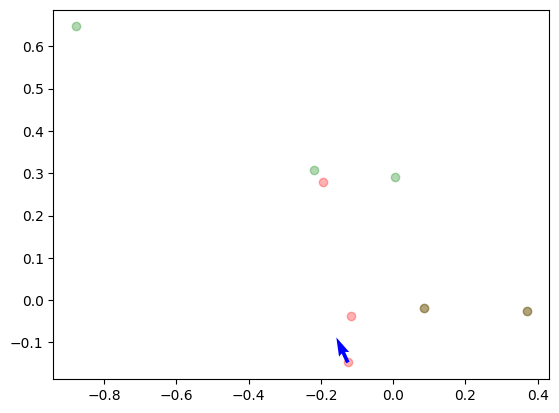

In [37]:
data = pkl.load(open('data.pkl', 'rb'))
init_poses = data['init_poses']
final_poses = data['final_poses']
forces = data['forces']
force_idxs = np.array(data['force_idxs'], dtype=int)
unique_elements = np.unique(init_poses[:, 0])


idx = 400
plt.scatter(init_poses[idx, ::2], init_poses[idx, 1::2], c='r', alpha=0.3, label='init_poses')
plt.scatter(final_poses[idx, ::2], final_poses[idx, 1::2], c='g', alpha=0.3, label='init_poses')
plt.quiver(init_poses[idx, 2*force_idxs[idx, 0]], init_poses[idx, 2*force_idxs[idx, 0]+1], 
                forces[idx, 0], forces[idx, 1], color='b', label='forces')

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from diffusers import DDPMScheduler

class 

In [ ]:
init_poses = torch.tensor(init_poses, dtype=torch.float32)
final_poses = torch.tensor(final_poses, dtype=torch.float32)
forces = torch.tensor(forces, dtype=torch.float32)
force_idxs = torch.tensor(force_idxs, dtype=torch.float32)

num_epochs = 100
batch_size = 32
idxs = np.arange(num_samples)
for epoch in range(num_epochs):
    np.random.shuffle(idxs)
    for i in range(0, num_samples, batch_size):
        idxs = idxs[i:i+batch_size]
        ip0 = init_poses[idxs].to(device)
        ip1 = forces[idxs].to(device)
        ip2 = force_idxs[idxs].to(device)
        tgt = final_poses[idxs].to(device)

        inputs = torch.cat((ip0, ip1, ip2), dim=1)

        optimizer.zero_grad()
        outputs = genM(inputs)
        loss = criterion(outputs, tgt)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
